### Total capacity estimation using recursive FMTLS
This notebook implements the recursive FMTLS method using the same data set you are already familiar with from last week. Remember that the true capacity of this cell is 10.0 Ah.

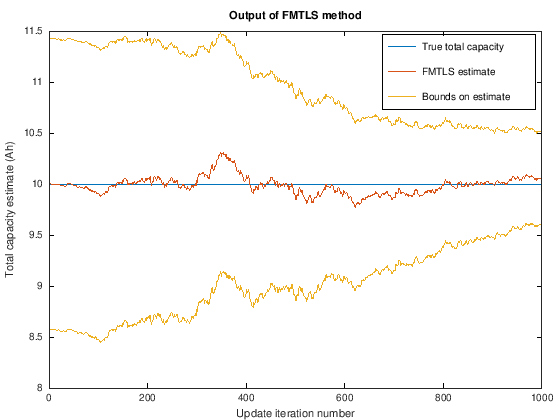

In [1]:
%% Set up data for problem
load readonly/Lesson425data.mat

%% FMTLS
SY = Sigmay(1);  % Assume always this value (which is true in this dataset)
SX = Sigmax(1);  % Assume always this value (which is true in this dataset)
K = sqrt(SX/SY); % Constant of proportionality

Qnom = 10;                        % Initialize nominal capacity
gamma = 1;                     % Fading-memory rate constant. Default = 1.00
SYinit = 1e-3;                    % Uncertainty of Q with respect to Qnom
c1 = 1/SYinit;                    % Correct initialization of c1 recursive value
c2 = Qnom/SYinit;                 % Correct initialization of c2 recursive value
c3 = Qnom^2/SYinit;               % Correct initialization of c3 recursive value

Qhat = 0*x;                       % Initialize storage for output estimate
SigmaQ = 0*x;                     % Initialize storage for estimation-error variance
for k = 1:length(x),
  c1 = gamma*c1 + x(k)^2/SY;      % Update c1 recursive parameter
  c2 = gamma*c2 + x(k)*y(k)/SY;   % Update c2 recursive parameter
  c3 = gamma*c3 + y(k)^2/SY;      % Upcate c3 recursive parameter
  
  Qhat(k) = (-c1+K^2*c3+sqrt((c1-K^2*c3)^2+4*K^2*c2^2))/(2*K^2*c2);
  H = ((-4*K^4*c2)*Q^3+(6*K^4*c3-6*c1*K^2)*Q^2+12*c2*K^2*Q+2*(c1-K^2*c3))/(Q^2*K^2+1)^3;
  
  SigmaQ(k) = 2/H;
end

xvals = 1:length(Qhat);
plot(xvals,10*ones(size(Qhat)),xvals,Qhat,[xvals,NaN,xvals],[Qhat+3*sqrt(SigmaQ),NaN,Qhat-3*sqrt(SigmaQ)]);
xlabel('Update iteration number'); ylabel('Total capacity estimate (Ah)');
title('Output of FMTLS method');   xlim([0 1000])
legend('True total capacity','FMTLS estimate','Bounds on estimate','location','northeast');

In [ ]:
Qhat

Qhat =

 Columns 1 through 8:

   10.0012   10.0018   10.0008    9.9985    9.9986    9.9994    9.9986    9.9993

 Columns 9 through 16:

    9.9995    9.9989    9.9969    9.9959    9.9976    9.9945    9.9942    9.9925

 Columns 17 through 24:

    9.9936    9.9945    9.9984    9.9989    9.9926    9.9917    9.9849    9.9838

 Columns 25 through 32:

    9.9839    9.9857    9.9837    9.9844    9.9886    9.9873    9.9801    9.9796

 Columns 33 through 40:

    9.9802    9.9776    9.9865    9.9879    9.9955   10.0054   10.0027   10.0029

 Columns 41 through 48:

   10.0027   10.0037   10.0017   10.0004    9.9963    9.9950    9.9959    9.9923

 Columns 49 through 56:

    9.9892    9.9890    9.9870    9.9815    9.9791    9.9827    9.9820    9.9806

 Columns 57 through 64:

    9.9702    9.9678    9.9594    9.9684    9.9709    9.9726    9.9683    9.9692

 Columns 65 through 72:

    9.9720    9.9646    9.9570    9.9617    9.9577    9.9574    9.9547    9.9619

 Columns 73 through 80:

    9.9

In [ ]:
3*sqrt(SigmaQ)